In [1]:
import os 

from ivim_analysis.IVIMAnalysis import IVIMAnalysis
from ivim_analysis.n_patients import readPatientsInfo

Welcome to ivim_analysis version 1.0.0


# Parameter initialization

In [2]:
patients_info_file = '../data/10patients.txt'
zhaog_path = '/data/users/cyang/acute_pancreatitis/unprocess/ivim'

n_analyses = readPatientsInfo(patients_info_file, zhaog_path)

In [3]:
import numpy as np

from dipy.io.gradients import read_bvals_bvecs
from dipy.data import get_fnames

_, fbval, fbvec = get_fnames('ivim')

_, bvecs = read_bvals_bvecs(fbval, fbvec)
bvals = np.array([20, 50, 80, 150, 200, 500, 800, 1000, 1500, 0])
bvecs = bvecs[0:10,:]


In [4]:
import pickle
import os 

output_path = "../output/pickles/ivim"

In [5]:
pickle_ivim_path = os.path.join(output_path, patient_id+'ivim_param_maps.pkl')

# Run analysis

In [ ]:
analysis.run_analysis(bvals, bvecs)

In [6]:
analysis.run_analysis(bvals=bvals, bvecs=bvecs, load_from_pickle=True, pickle_ivim_path=pickle_ivim_path)

Loading data from pickle file


AssertionError: 

# Plot

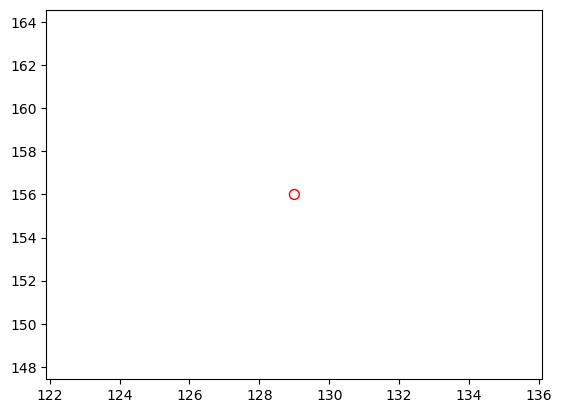

In [ ]:
analysis.plt_circle_roi()

10


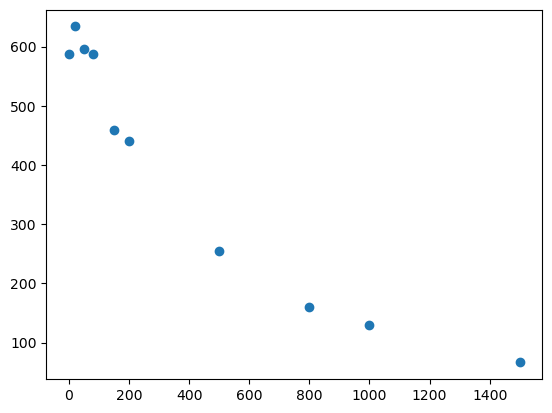

In [ ]:
analysis.plot_b_intensities()

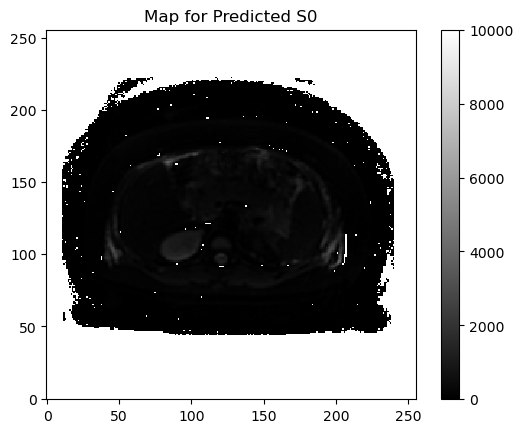

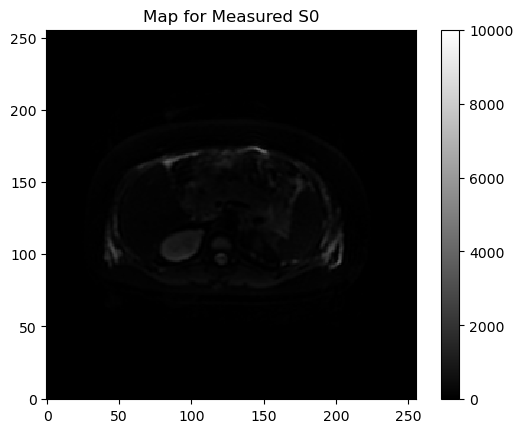

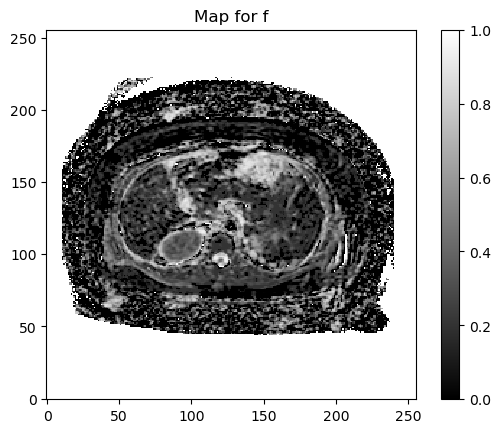

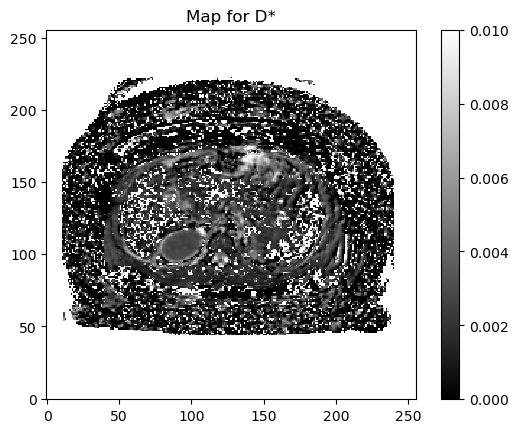

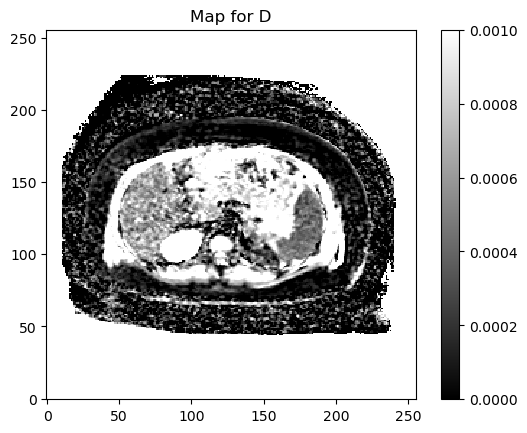

In [ ]:
analysis.plot_maps()

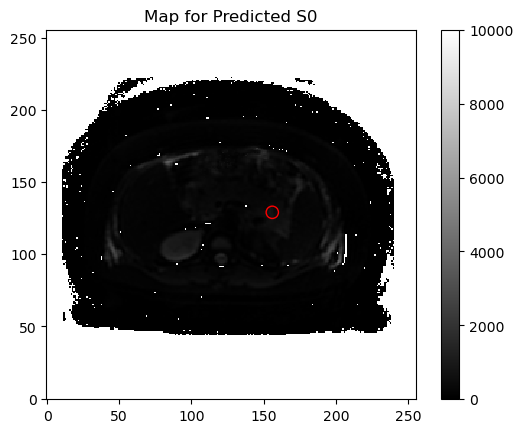

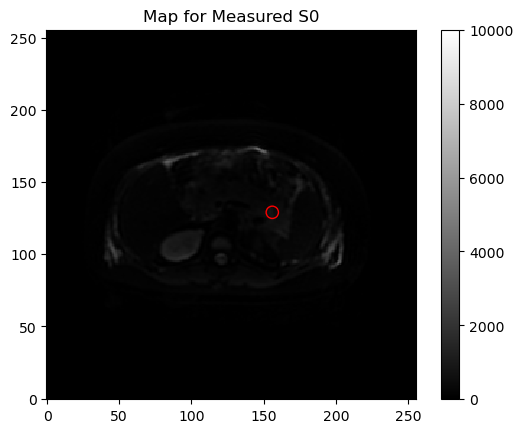

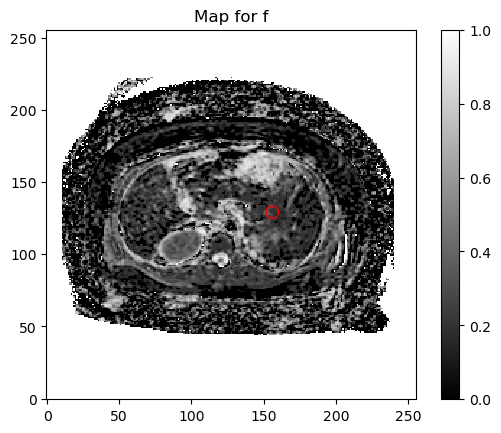

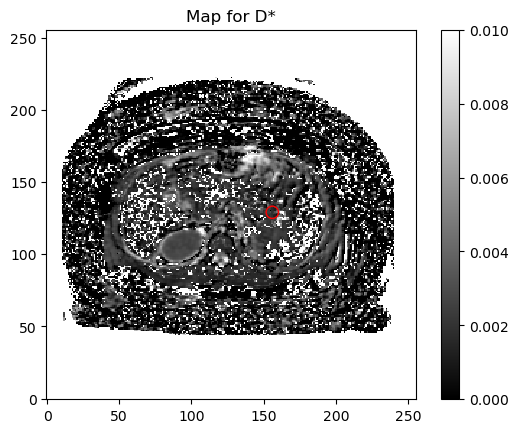

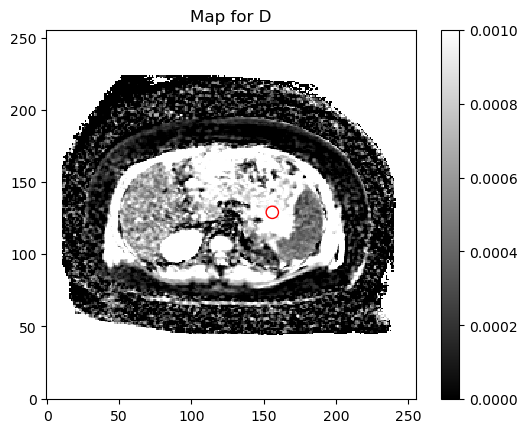

In [ ]:
analysis.plot_maps_roi()

In [ ]:
analysis.estimated_params_of_roi(True)

Estimated parameter: 637.8873433631411
Estimated parameter: 0.24230608288740665
Estimated parameter: 0.0021043371105256823
Estimated parameter: 0.0013639413350741468


[637.8873433631411,
 0.24230608288740665,
 0.0021043371105256823,
 0.0013639413350741468]

In [ ]:
analysis.plot_maps(from_pickle=True, pickle_ivim_path=pickle_ivim_path)

AttributeError: 'NoneType' object has no attribute '__dict__'

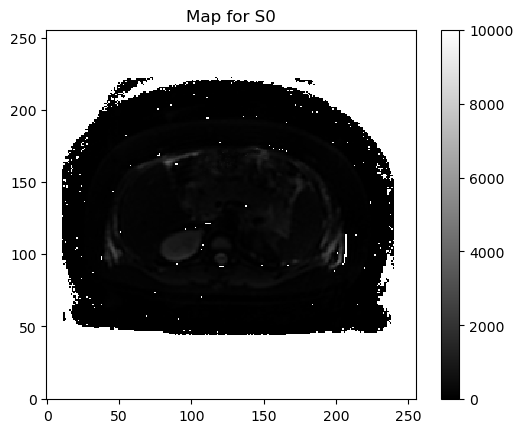

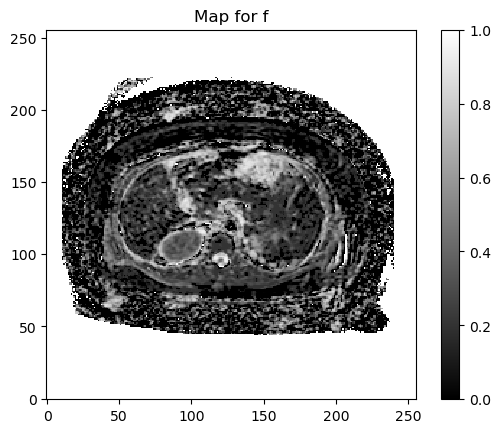

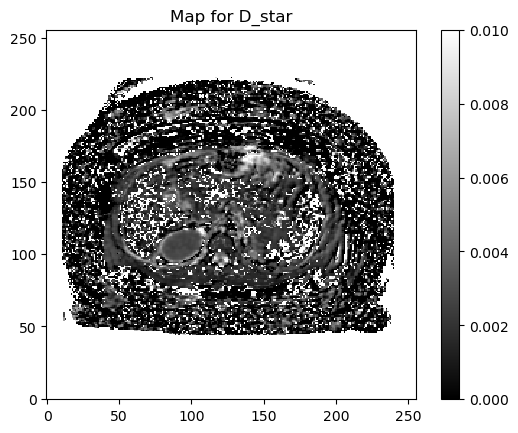

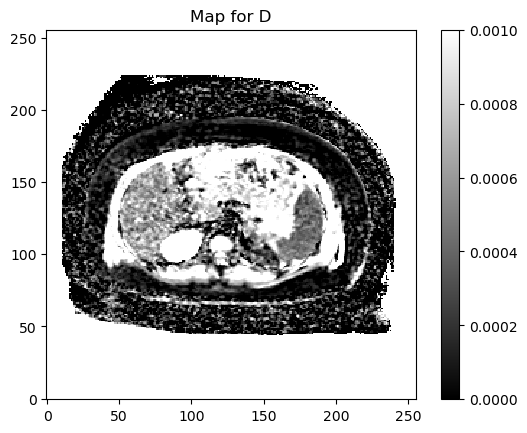

In [ ]:
lim = [(0, 10000), (0, 1), (0, 0.01), (0, 0.001)]
for key, value, lim in zip(analysis.ivim_params_maps.__dict__.keys(), analysis.ivim_params_maps.__dict__.values(), lim):
    plot_map(value, key, lim, key)